In [48]:
import csv
import numpy as np
import pandas as pd
import future

In [49]:
DS = pd.read_csv("DataAnnotated.csv")

In [50]:
DS

,text_ID,word,start,end,NewTag
0,45389,Kergelt,NaN,NaN,NaN
1,45389,liigkaaluline.,0.0,14.0,NaN
2,45389,"Nahk,",15.0,20.0,NaN
3,45389,limaskestad,21.0,32.0,NaN
4,45389,tavalist,33.0,41.0,NaN
...,...,...,...,...,...
63908,1954,meloksikaam,7950.0,7961.0,NaN
63909,1954,(Movalis,7962.0,7970.0,NaN
63910,1954,"7,5",7971.0,7974.0,NaN
63911,1954,mg)N,7975.0,7979.0,NaN


In [51]:
DS['NewTag'].fillna('unk', inplace=True)

In [52]:
data = DS[['text_ID','word','NewTag']]
data.columns = ['sentence_idx','word','tag']

In [53]:
class SentenceGetter(object):
    
    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w, t) for w,t in zip(s["word"].values.tolist(),
                                                        s["tag"].values.tolist())]
        self.grouped = self.dataset.groupby("sentence_idx").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [54]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [55]:
len(sentences)

495

In [56]:
sentences

[[('29.06.2010', 'unk'),
  ('Radioloogiline', 'unk'),
  ('uuring,', 'unk'),
  ('vastus', 'unk'),
  ('nr', 'unk'),
  ('769_15521_1', 'unk'),
  ('Parema', 'unk'),
  ('kopsu', 'unk'),
  ('ülaväljas', 'unk'),
  ('eri', 'unk'),
  ('suurusega', 'unk'),
  ('kolletest', 'unk'),
  ('koosnev', 'unk'),
  ('varjustus.', 'unk'),
  ('Kolded', 'unk'),
  ('kohati', 'unk'),
  ('laatuvad.', 'unk'),
  ('Vasemal', 'unk'),
  ('ülaväljas', 'unk'),
  ('väikekoldeline', 'unk'),
  ('varjustatus.Võrreldes', 'unk'),
  ('24.05.10', 'unk'),
  ('ü/v-ga', 'unk'),
  ('leid', 'unk'),
  ('püsib', 'unk'),
  ('dünaamikata.', 'unk'),
  ('Fluidopneumotooraksit', 'unk'),
  ('ei', 'unk'),
  ('tähelda.', 'unk'),
  ('30.06.2010', 'unk'),
  ('erütrotsüütide', 'unk'),
  ('settekiirus', 'unk'),
  ('statiivil', 'unk'),
  ('12', 'unk'),
  ('(&lt;11', 'unk'),
  ('mm/h', 'unk'),
  (')', 'unk'),
  ('hemogramm', 'unk'),
  ('viieosalise', 'unk'),
  ('leukogrammiga', 'unk'),
  ('WBC', 'unk'),
  ('4.67', 'unk'),
  ('(3,5', 'unk'),
  ('..'

In [57]:
import pickle
 
 
# Step 2
with open('file.txt', 'wb') as f:
 
  # Step 3
  pickle.dump(sentences, f)

In [33]:
# Step 1
import pickle
 
# Step 2
with open('file.txt', 'rb') as f:
 
    # Step 3
    mySentences = pickle.load(f)
 
    # After config_dictionary is read from file
    print(mySentences)

[[('29.06.2010', 'unk'), ('Radioloogiline', 'unk'), ('uuring,', 'unk'), ('vastus', 'unk'), ('nr', 'unk'), ('769_15521_1', 'unk'), ('Parema', 'unk'), ('kopsu', 'unk'), ('ülaväljas', 'unk'), ('eri', 'unk'), ('suurusega', 'unk'), ('kolletest', 'unk'), ('koosnev', 'unk'), ('varjustus.', 'unk'), ('Kolded', 'unk'), ('kohati', 'unk'), ('laatuvad.', 'unk'), ('Vasemal', 'unk'), ('ülaväljas', 'unk'), ('väikekoldeline', 'unk'), ('varjustatus.Võrreldes', 'unk'), ('24.05.10', 'unk'), ('ü/v-ga', 'unk'), ('leid', 'unk'), ('püsib', 'unk'), ('dünaamikata.', 'unk'), ('Fluidopneumotooraksit', 'unk'), ('ei', 'unk'), ('tähelda.', 'unk'), ('30.06.2010', 'unk'), ('erütrotsüütide', 'unk'), ('settekiirus', 'unk'), ('statiivil', 'unk'), ('12', 'unk'), ('(&lt;11', 'unk'), ('mm/h', 'unk'), (')', 'unk'), ('hemogramm', 'unk'), ('viieosalise', 'unk'), ('leukogrammiga', 'unk'), ('WBC', 'unk'), ('4.67', 'unk'), ('(3,5', 'unk'), ('..', 'unk'), ('8,8', 'unk'), ('E9/L', 'unk'), (')', 'unk'), ('RBC', 'unk'), ('4.32', 'unk

In [34]:
len(mySentences)

495

In [11]:
LengthsList = []
for i in range(len(sentences)):
    LengthsList.append(len(sentences[i]))

In [72]:
np.mean(LengthsList)

129.11717171717171

In [12]:
from math import nan

words = list(set(data["word"].values))
n_words = len(words)

tags = []
for tag in set(data["tag"].values):
    if tag is nan or isinstance(tag, float):
        tags.append('unk')
    else:
        tags.append(tag)
n_tags = len(tags)

from future.utils import iteritems

word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}
idx2tag = {v: k for k, v in iteritems(tag2idx)}

In [35]:
word2idx

{nan: 0,
 'nimmeosa': 1,
 'järgnevatel': 2,
 'liigesvalud.': 3,
 'perearst': 4,
 '0.715': 5,
 'luksumine,': 6,
 'põhjustel).': 7,
 'nina': 8,
 '27': 9,
 '(&lt;0,5': 10,
 '0)': 11,
 '11:30': 12,
 '186/98': 13,
 'seinaline,': 14,
 '26.02.': 15,
 'nädalavahetusel': 16,
 'CT-s': 17,
 'säärte': 18,
 'väljaöeldud': 19,
 'cmLVPWd': 20,
 'obj': 21,
 '19:45': 22,
 '139/90': 23,
 'märganud': 24,
 'kiuned.': 25,
 'rögaeritus': 26,
 'kuus': 27,
 '140/100.': 28,
 'ühtlane.': 29,
 'bikuspiidne,': 30,
 'aktiivsusega': 31,
 '81%.': 32,
 'hinnatud': 33,
 'minim.': 34,
 'Oluliste': 35,
 'tihedam.': 36,
 'infektsiooniga.': 37,
 'proopria': 38,
 'üldseisundis,RR': 39,
 'konsultatsioonile.': 40,
 'sõlm': 41,
 'Kiirabis.': 42,
 'pais.': 43,
 '97%': 44,
 'paroksüsme,': 45,
 'voolu': 46,
 'alanemine.': 47,
 'endises': 48,
 '*S': 49,
 'Repolarisatsioonihäirega': 50,
 'Neoadjuvantse': 51,
 'Enda': 52,
 'baasil': 53,
 'isol.': 54,
 'paremini,': 55,
 'pika': 56,
 'annustega': 57,
 'Kardiaalselt': 58,
 'aitavad.':

In [36]:
tag2idx

{'unk': 0, 'value': 1, 'object': 2}

In [37]:
idx2tag

{0: 'unk', 1: 'value', 2: 'object'}

In [10]:
len(words)

19352

In [20]:
n_tags

3

In [58]:
max([len(s) for s in sentences])


3206

In [59]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# maxlen = max([len(s) for s in sentences])
maxlen = 129
X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=maxlen, sequences=X, padding="post",value=n_words - 1)

y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=maxlen, sequences=y, padding="post", value=tag2idx["unk"])
y = [to_categorical(i, num_classes=n_tags) for i in y]

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_test

array([[12967,   217, 17727, ..., 19351, 19351, 19351],
       [19085, 14823, 10976, ..., 19351, 19351, 19351],
       [18688, 19351, 19351, ..., 19351, 19351, 19351],
       ...,
       [  940, 13345, 16382, ...,  5122,  9131,  1576],
       [ 7907, 16604, 12561, ..., 11325,  5300,  8553],
       [17099,  9244, 14543, ..., 17473,  7404, 13985]])

In [44]:
import pickle

def StoreData(myObject,ObjectName):
        with open(ObjectName+'.txt', 'wb') as f:
          pickle.dump(myObject, f)
        


In [45]:
StoreData(X_train,"X_train")
StoreData(X_test,"X_test")
StoreData(y_train,"y_train")
StoreData(y_test,"y_test")

In [46]:
# with open('X_test.txt', 'rb') as f:
#     # Step 3
#     X_testTry = pickle.load(f)

In [23]:
len(y_test[1])

129

In [75]:
from platform import python_version

print(python_version())


3.7.6


In [68]:
X_train.shape

(396, 129)

In [75]:
from keras.models import Model, Input
from keras.layers import LSTM,MaxPooling1D,Flatten,Embedding, Dense, TimeDistributed, Conv1D,Dropout, Bidirectional
import keras as k
from keras_contrib.layers import CRF

input = Input(shape=(maxlen,))
# word_embedding_size = 150
word_embedding_size = maxlen
# Embedding Layer
model = Embedding(input_dim=n_words, output_dim=word_embedding_size, input_length=maxlen)(input)


# (number of sentences,  words, 100 output dimension or filters)   
# 495,19352,150
# batchSize = number of sentences    
# length = number of words in each sentence   
# channels = dimension of the embedding's output.  
# (19352,495)
model = Conv1D(filters=150,
              kernel_size= 3,  # 3 means 3 words
              padding='same',  # valid means no padding
              strides=1,  # see explnation above
              activation='relu',
              use_bias=True)(model)

# model = MaxPooling1D(pool_size=2)(model) # (?, 27, 10), (?, 24, 10)
# model = Flatten()(model) # (?, 270), (?, 240)
        
        
# BI-LSTM Layer
model = Bidirectional(LSTM(units=word_embedding_size, 
                           return_sequences=True, 
                           dropout=0.5, 
                           recurrent_dropout=0.5, 
                           kernel_initializer=k.initializers.he_normal()))(model)

model = LSTM(units=word_embedding_size * 2, 
             return_sequences=True, 
             dropout=0.5, 
             recurrent_dropout=0.5, 
             kernel_initializer=k.initializers.he_normal())(model)

# TimeDistributed Layer
model = TimeDistributed(Dense(n_tags, activation="relu"))(model)  

# CRF Layer
crf = CRF(n_tags)

out = crf(model)  # output
model = Model(input, out)

In [76]:
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

#Optimiser 
adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

# Compile model
model.compile(optimizer=adam, loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])

model.summary()


C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\keras_contrib-2.0.8-py3.7.egg\keras_contrib\layers\crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\keras_contrib-2.0.8-py3.7.egg\keras_contrib\layers\crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 129)               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 129, 129)          2496408   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 129, 150)          58200     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 129, 258)          288960    
_________________________________________________________________
lstm_6 (LSTM)                (None, 129, 258)          533544    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 129, 3)            777       
_________________________________________________________________
crf_3 (CRF)                  (None, 129, 3)            27  

In [77]:

# Saving the best model only
filepath="ner-CNN-bi-lstm-model-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the best model
history = model.fit(X_train, np.array(y_train), batch_size=256, epochs=10, validation_split=0.1, verbose=1, callbacks=callbacks_list)

C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 356 samples, validate on 40 samples
Epoch 1/10
356/356 [==============================] - 8s 21ms/step - loss: 0.6746 - crf_viterbi_accuracy: 0.5773 - accuracy: 0.9873 - val_loss: 0.5281 - val_crf_viterbi_accuracy: 0.9870 - val_accuracy: 0.9870

Epoch 00001: val_accuracy improved from -inf to 0.98702, saving model to ner-CNN-bi-lstm-model-0.99.hdf5
Epoch 2/10
356/356 [==============================] - 6s 17ms/step - loss: 0.5125 - crf_viterbi_accuracy: 0.9865 - accuracy: 0.9873 - val_loss: 0.3484 - val_crf_viterbi_accuracy: 0.9870 - val_accuracy: 0.9870

Epoch 00002: val_accuracy did not improve from 0.98702
Epoch 3/10
356/356 [==============================] - 7s 19ms/step - loss: 0.3498 - crf_viterbi_accuracy: 0.9873 - accuracy: 0.9873 - val_loss: 0.1878 - val_crf_viterbi_accuracy: 0.9870 - val_accuracy: 0.9870

Epoch 00003: val_accuracy did not improve from 0.98702
Epoch 4/10
356/356 [==============================] - 7s 20ms/step - loss: 0.2062 - crf_viterbi_accuracy: 0.98

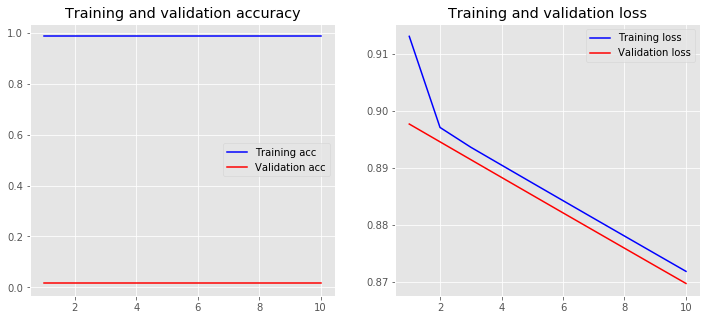

In [63]:
# Plot the graph 
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)


In [78]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i])
        out.append(out_i)
    return out
test_pred = model.predict(X_test, verbose=1)   
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_test)

99/99 [==============================] - 1s 10ms/step


In [79]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

F1-score: 11.3%


In [80]:
from  sklearn_crfsuite.metrics import flat_classification_report  
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)

              precision    recall  f1-score   support

      object       0.00      0.00      0.00       114
         unk       0.99      1.00      0.99     12599
       value       0.00      0.00      0.00        58

    accuracy                           0.99     12771
   macro avg       0.33      0.33      0.33     12771
weighted avg       0.97      0.99      0.98     12771



C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
TP = {}
TN = {}
FP = {}
FN = {}
for tag in tag2idx.keys():
    TP[tag] = 0
    TN[tag] = 0    
    FP[tag] = 0    
    FN[tag] = 0    

def accumulate_score_by_tag(gt, pred):
    """
    For each tag keep stats
    """
    if gt == pred:
        TP[gt] += 1
    elif gt != 'O' and pred == 'O':
        FN[gt] +=1
    elif gt == 'O' and pred != 'O':
        FP[gt] += 1
    else:
        TN[gt] += 1
for i, sentence in enumerate(X_test):
    y_hat = np.argmax(test_pred[0], axis=-1)
    gt = np.argmax(y_test[0], axis=-1)
    for idx, (w,pred) in enumerate(zip(sentence,y_hat)):
        accumulate_score_by_tag(idx2tag[gt[idx]],tags[pred])
for tag in tag2idx.keys():
    print(f'tag:{tag}')    
    print('\t TN:{:10}\tFP:{:10}'.format(TN[tag],FP[tag]))
    print('\t FN:{:10}\tTP:{:10}'.format(FN[tag],TP[tag]))
#Reference: https://www.kaggle.com/nikkisharma536/ner-with-bilstm-and-crf/notebook

tag:unk
	 TN:         0	FP:         0
	 FN:         0	TP:     12573
tag:value
	 TN:        99	FP:         0
	 FN:         0	TP:         0
tag:object
	 TN:        99	FP:         0
	 FN:         0	TP:         0
